# Customer_Segmentation

# Data Preprocessing 

In [1]:
# Steps of preprocessing Data
# step 1 - Import necessary liabrary
# step 2 - Read Dataset
# step 3 - Sanity Check of Data
# step 4 - Exploratory Data Analysis (EDA)
# step 5 - Missing Values Treatments
# step 6 - Outliers treatment
# step 7 - duplicates & garbage value treatments

## Step 1 : Import necessary liabrary 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 : Read Dataset 

In [3]:
df=pd.read_csv(r"C:\Users\Sarvadnya\Documents\Internship\CSV\Customer_Segmentation_Analysis.csv")

In [4]:
#Top 5 rows
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I100008,C199951,Male,65,Clothing,5,1500.40,Cash,10-07-2022,Emaar Square Mall
1,I100014,C138893,Male,55,Cosmetics,5,203.30,Cash,18-06-2021,Viaport Outlet
2,I100015,C132779,Female,35,Clothing,2,600.16,Debit Card,04-03-2021,Mall of Istanbul
3,I100024,C244411,Female,67,Books,3,45.45,Credit Card,05-01-2023,Emaar Square Mall
4,I100027,C150002,Female,19,Technology,4,4200.00,Cash,18-05-2022,Mall of Istanbul


In [5]:
#Bottom 5 rows
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I999956,C925896,Male,69,Toys,4,143.36,Credit Card,16-08-2021,Metrocity
99453,I999959,C695980,Female,68,Clothing,4,1200.32,Credit Card,13-10-2021,Kanyon
99454,I999972,C195931,Male,63,Technology,2,2100.00,Debit Card,23-01-2021,Istinye Park
99455,I999973,C248542,Male,28,Technology,1,1050.00,Credit Card,11-01-2023,Mall of Istanbul
99456,I999994,C299697,Female,21,Technology,3,3150.00,Cash,09-04-2021,Kanyon


## Step 3 : Sanity Check of Data 

In [6]:
#Shape i.e number of rows & colums
df.shape

(99457, 10)

In [7]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [8]:
#finding missing value 
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [9]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

invoice_no        0.0
customer_id       0.0
gender            0.0
age               0.0
category          0.0
quantity          0.0
price             0.0
payment_method    0.0
invoice_date      0.0
shopping_mall     0.0
dtype: float64

In [10]:
#finding duplicates
df.duplicated().sum()

0

In [11]:
#identifying Garbage Values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

I100008    1
I312466    1
I312529    1
I312524    1
I312523    1
          ..
I206379    1
I206377    1
I206375    1
I206374    1
I999994    1
Name: invoice_no, Length: 99457, dtype: int64
******************************
C199951    1
C139574    1
C419632    1
C123511    1
C248293    1
          ..
C272482    1
C238664    1
C326234    1
C307052    1
C299697    1
Name: customer_id, Length: 99457, dtype: int64
******************************
Female    59482
Male      39975
Name: gender, dtype: int64
******************************
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64
******************************
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
******************************
24-11-2021    159
26-02-2023    156
25-07-2022    155
06-01-2021    155
23-10-20

## Step 4 : Exploratory Data Analysis (EDA) 

In [12]:
#descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


In [13]:
#Categorical column
df.describe(include="object").T

,count,unique,top,freq
invoice_no,99457,99457,I100008,1
customer_id,99457,99457,C199951,1
gender,99457,2,Female,59482
category,99457,8,Clothing,34487
payment_method,99457,3,Cash,44447
invoice_date,99457,797,24-11-2021,159
shopping_mall,99457,10,Mall of Istanbul,19943


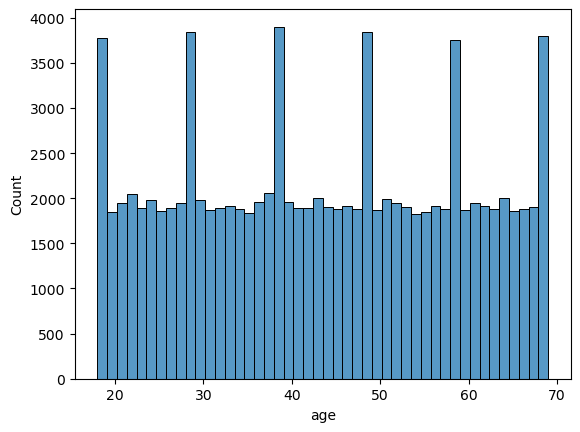

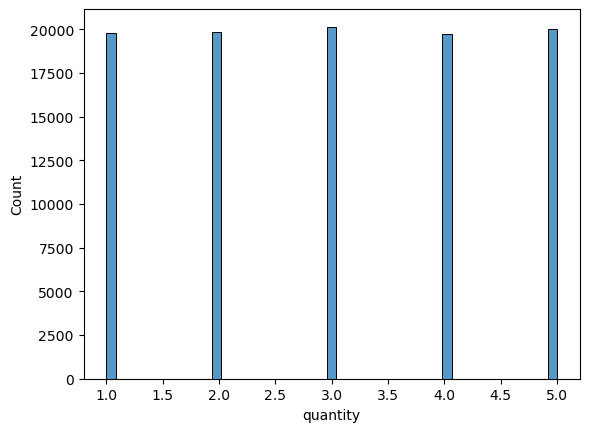

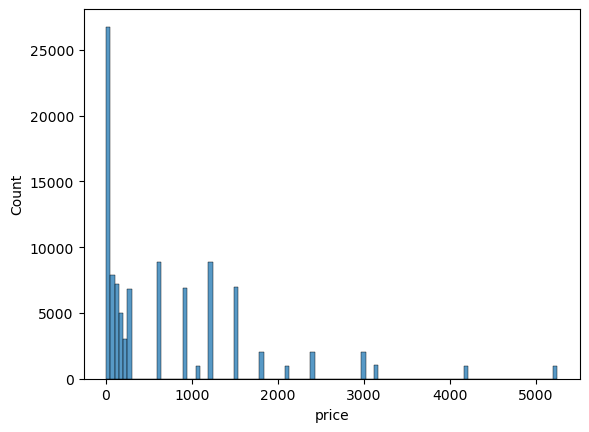

In [14]:
# Histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data = df, x = i)
    plt.show()

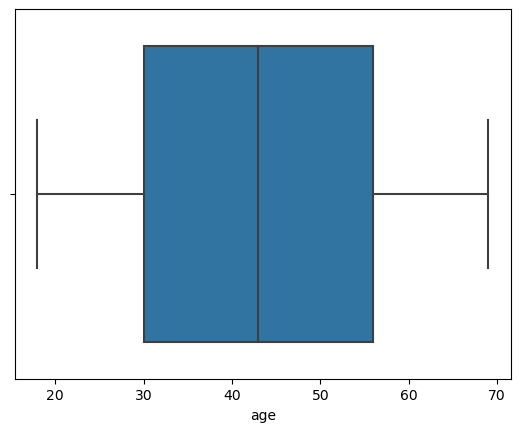

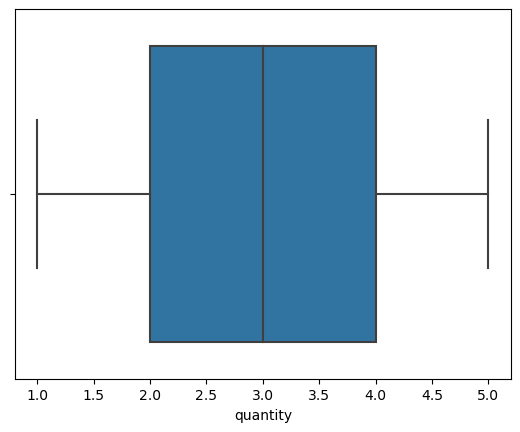

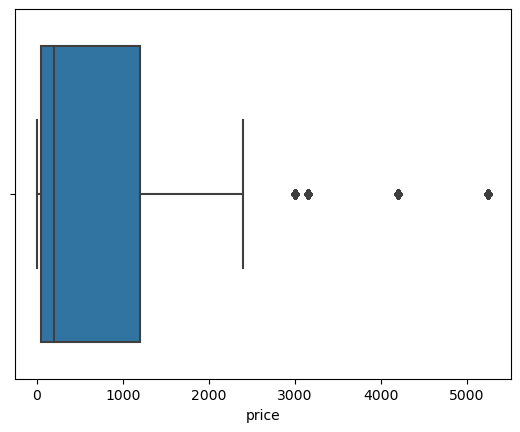

In [15]:
# BoxPlot to identify the outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data = df, x = i)
    plt.show()

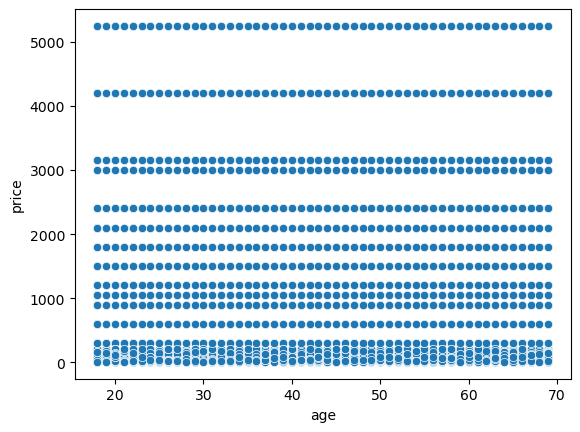

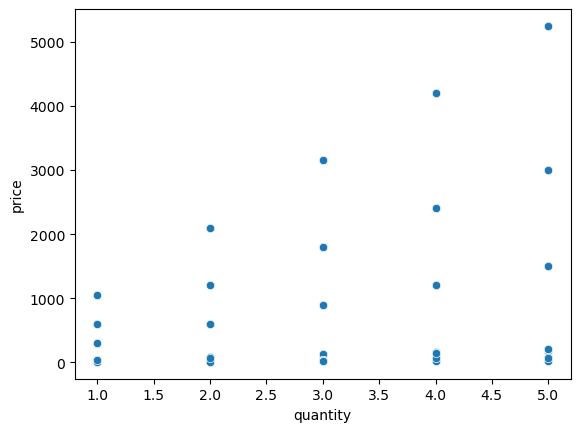

In [16]:
# Scatterplot to understand the relationship 
for i in ['age', 'quantity']:
    sns.scatterplot(data = df, x = i, y = 'price')
    plt.show()

In [17]:
df.select_dtypes(include="number").columns
#df.select_dtypes(include="object").columns

Index(['age', 'quantity', 'price'], dtype='object')

In [20]:
#correlation with heatmap to interpret 
s = df.select_dtypes(include="number").corr()

<Axes: >

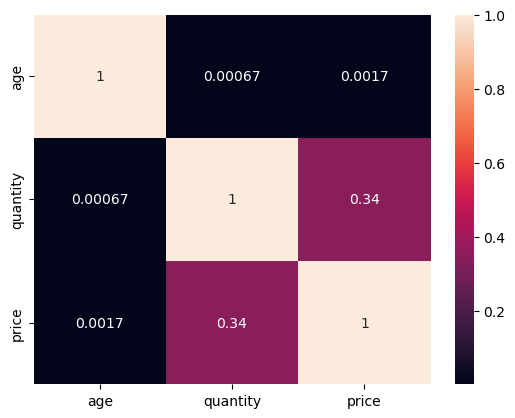

In [23]:
sns.heatmap(data = s, annot = True)

## Step 5 : Missing Value Treatment 

In [ ]:
#choose the method of imputing missing Value
# mean, mode, median or KNNImputer

In [ ]:
#For changing missing values with median
# for i in ["Column_Name"]:
   # df[i].fillna(df[i].median(),inplace = True)

In [ ]:
#algorithm to fill missing values

# from sklearn.impute import KNNImputer
# impute = KNNImputer()

#for i in df.select_dtypes(include = "number").column:
#   df[i]= impute.fit_transform(df[[i]])

### In this data there's zero missing value, so we can skip this step! 

## Step 6 : Outliers treatments 

In [ ]:
# Decide whether to do outliers treatment or not ?

### in this case we will not do the outlier treatment 

## Step 7 : Duplicates & Garbage value treatment 

### In this dataset we don't have any duplicates and Garbage Value, so we will skip this step!